In [ ]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 7.4 MB/s eta 0:00:00


SyntaxError: invalid syntax (ipython-input-525519296.py, line 1)

In [ ]:
import pandas as pd
from sktime.clustering.k_means import TimeSeriesKMeans
import seaborn as sns
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Tải dữ liệu từ tệp CSV
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining 2/Time series code/imdb_ts_zscore_normalized.csv')
    print("Tải tệp thành công!")

    # Tách các cột chuỗi thời gian (từ '0' đến '99')
    time_series_columns = [str(i) for i in range(100)]
    X = df[time_series_columns].to_numpy()
    y_train = df['rating_category'].to_numpy()
    print(f"Kích thước của mảng chuỗi thời gian (X): {X.shape}")

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")

Tải tệp thành công!
Kích thước của mảng chuỗi thời gian (X): (1134, 100)


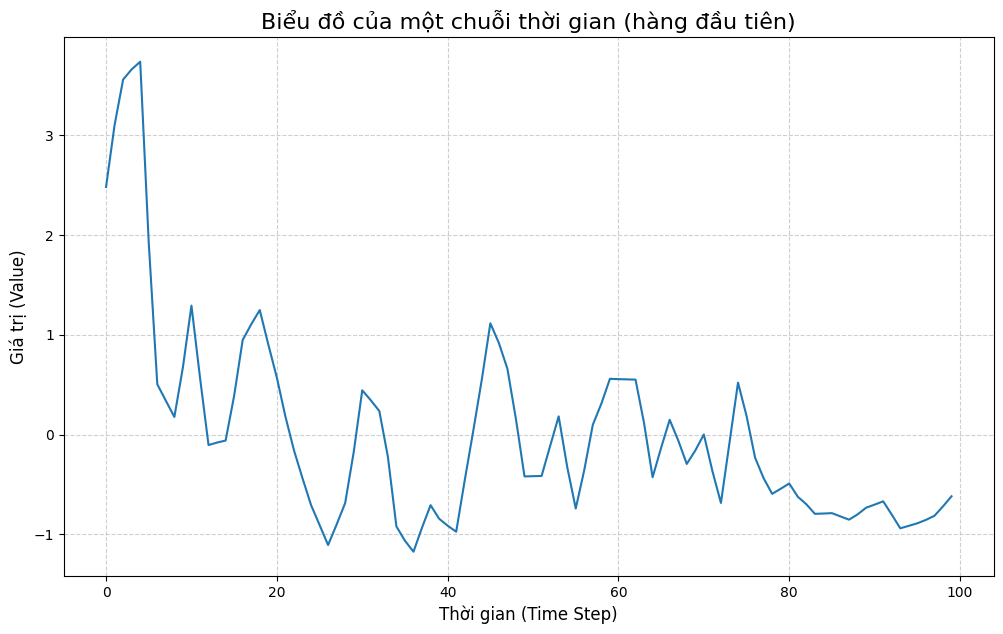

In [ ]:
# Đảm bảo bạn đã chạy Bước 1 trước
plt.figure(figsize=(12, 7))
plt.title("Biểu đồ của một chuỗi thời gian (hàng đầu tiên)", fontsize=16)
plt.plot(X[0])
plt.xlabel("Thời gian (Time Step)", fontsize=12)
plt.ylabel("Giá trị (Value)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('single_time_series.png')
plt.show()

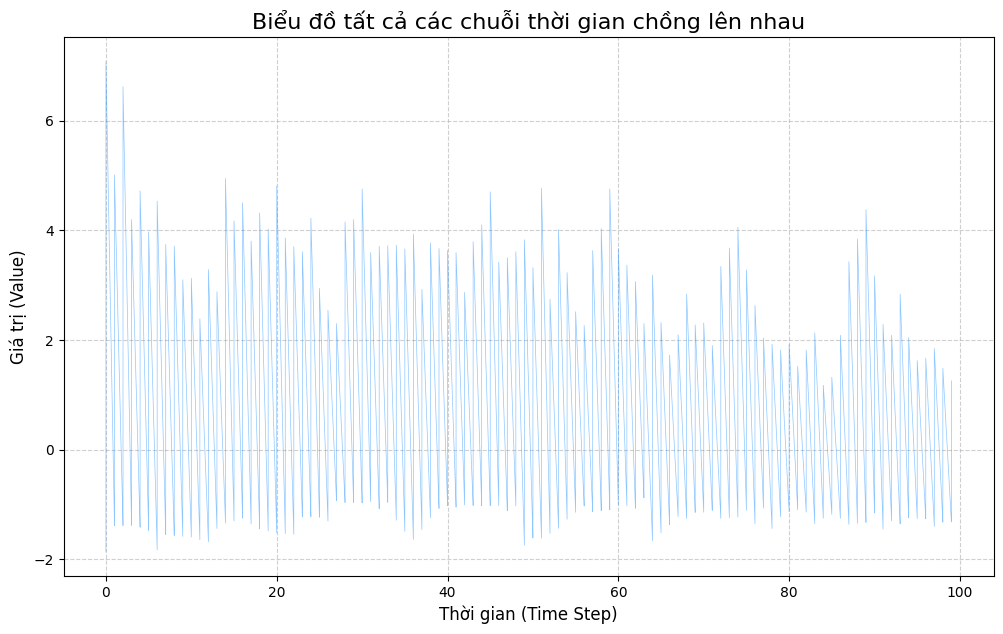

In [ ]:
# Đảm bảo bạn đã chạy Bước 1 trước
# Chuyển đổi mảng numpy thành DataFrame để "melt"
df_ts = pd.DataFrame(X)
df_melt = df_ts.melt(var_name="time", value_name="observation")

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melt, x="time", y="observation", estimator=None, lw=0.5, alpha=0.5, color='dodgerblue')
plt.title("Biểu đồ tất cả các chuỗi thời gian chồng lên nhau", fontsize=16)
plt.xlabel("Thời gian (Time Step)", fontsize=12)
plt.ylabel("Giá trị (Value)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('all_time_series.png')
plt.show()

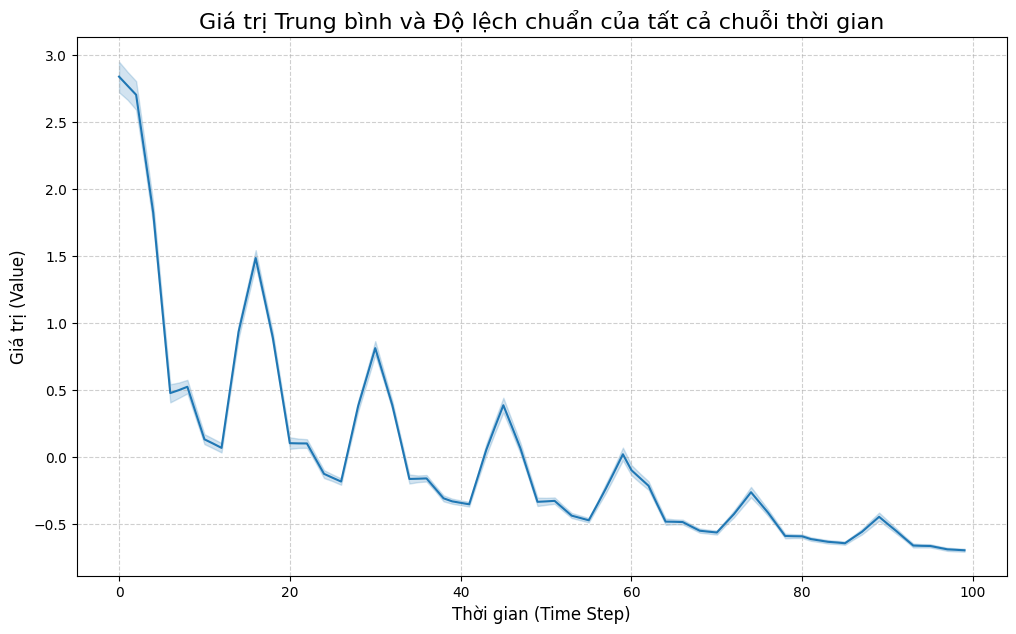

In [ ]:
# Đảm bảo bạn đã chạy Bước 3 trước
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melt, x="time", y="observation") # estimator='mean' là mặc định
plt.title("Giá trị Trung bình và Độ lệch chuẩn của tất cả chuỗi thời gian", fontsize=16)
plt.xlabel("Thời gian (Time Step)", fontsize=12)
plt.ylabel("Giá trị (Value)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('mean_std_time_series.png')
plt.show()

## Distance-based Clustering

## Find out suitable n of clusters


Bắt đầu chạy K-Means và tính toán 4 chỉ số...
  k=2, Silhouette=0.596, Calinski-Harabasz=1005.88, Davies-Bouldin=0.912
  k=3, Silhouette=0.479, Calinski-Harabasz=708.67, Davies-Bouldin=1.301
  k=4, Silhouette=0.474, Calinski-Harabasz=645.40, Davies-Bouldin=1.158
  k=5, Silhouette=0.241, Calinski-Harabasz=540.84, Davies-Bouldin=1.446
  k=6, Silhouette=0.218, Calinski-Harabasz=451.37, Davies-Bouldin=1.532
  k=7, Silhouette=0.218, Calinski-Harabasz=442.98, Davies-Bouldin=1.582
  k=8, Silhouette=0.470, Calinski-Harabasz=410.06, Davies-Bouldin=1.344
  k=9, Silhouette=0.452, Calinski-Harabasz=365.49, Davies-Bouldin=1.492
  k=10, Silhouette=0.234, Calinski-Harabasz=370.21, Davies-Bouldin=1.601
  k=11, Silhouette=0.236, Calinski-Harabasz=349.61, Davies-Bouldin=1.491
  k=12, Silhouette=0.215, Calinski-Harabasz=335.50, Davies-Bouldin=1.496
  k=13, Silhouette=0.215, Calinski-Harabasz=320.23, Davies-Bouldin=1.510
  k=14, Silhouette=0.171, Calinski-Harabasz=309.73, Davies-Bouldin=1.548
  k=15, Sil

/tmp/ipython-input-1967093290.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipython-input-1967093290.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipython-input-1967093290.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


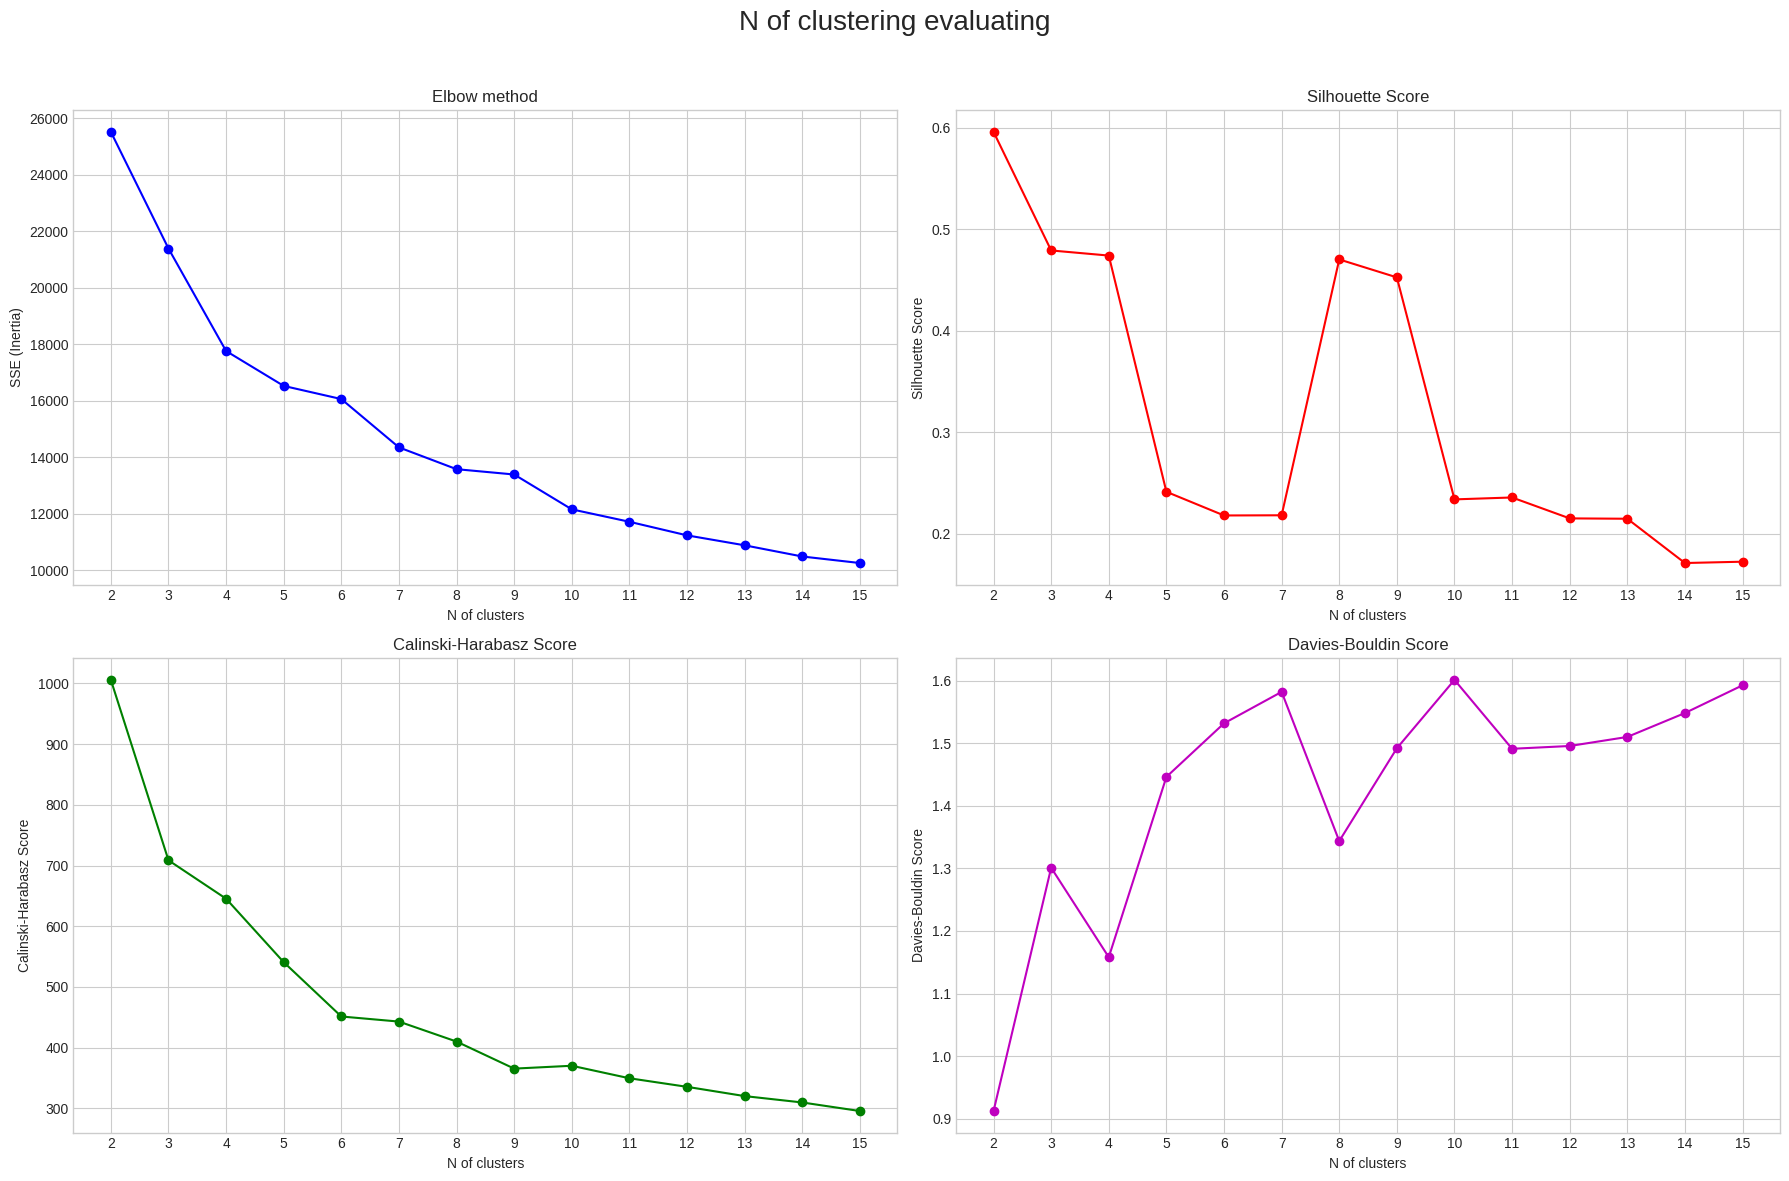

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# --- Bước 1: Tải và chuẩn bị dữ liệu ---
try:
    # --- Bước 2: Tính toán các chỉ số cho nhiều giá trị k ---
    k_range = range(2, 16)
    sse = []
    silhouette_scores = []
    calinski_scores = []
    davies_scores = []

    print("\nBắt đầu chạy K-Means và tính toán 4 chỉ số...")
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X)
        labels = kmeans.labels_

        # Lưu các chỉ số
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
        calinski_scores.append(calinski_harabasz_score(X, labels))
        davies_scores.append(davies_bouldin_score(X, labels))

        print(f"  k={k}, Silhouette={silhouette_scores[-1]:.3f}, Calinski-Harabasz={calinski_scores[-1]:.2f}, Davies-Bouldin={davies_scores[-1]:.3f}")

    # --- Bước 3: Trực quan hóa kết quả ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('N of clustering evaluating', fontsize=20)

    # 1. Elbow Method
    axs[0, 0].plot(k_range, sse, 'bo-')
    axs[0, 0].set_xlabel('N of clusters')
    axs[0, 0].set_ylabel('SSE (Inertia)')
    axs[0, 0].set_title('Elbow method')
    axs[0, 0].set_xticks(k_range)

    # 2. Silhouette Score (Cao hơn là tốt hơn)
    axs[0, 1].plot(k_range, silhouette_scores, 'ro-')
    axs[0, 1].set_xlabel('N of clusters')
    axs[0, 1].set_ylabel('Silhouette Score')
    axs[0, 1].set_title('Silhouette Score')
    best_k_silhouette = k_range[np.argmax(silhouette_scores)]
    #axs[0, 1].axvline(x=best_k_silhouette, color='r', linestyle='--', label=f'Tốt nhất: k={best_k_silhouette}')
    axs[0, 1].legend()
    axs[0, 1].set_xticks(k_range)

    # 3. Calinski-Harabasz Score (Cao hơn là tốt hơn)
    axs[1, 0].plot(k_range, calinski_scores, 'go-')
    axs[1, 0].set_xlabel('N of clusters')
    axs[1, 0].set_ylabel('Calinski-Harabasz Score')
    axs[1, 0].set_title('Calinski-Harabasz Score')
    best_k_calinski = k_range[np.argmax(calinski_scores)]
    #axs[1, 0].axvline(x=best_k_calinski, color='g', linestyle='--', label=f'Tốt nhất: k={best_k_calinski}')
    axs[1, 0].legend()
    axs[1, 0].set_xticks(k_range)

    # 4. Davies-Bouldin Score (Thấp hơn là tốt hơn)
    axs[1, 1].plot(k_range, davies_scores, 'mo-')
    axs[1, 1].set_xlabel('N of clusters')
    axs[1, 1].set_ylabel('Davies-Bouldin Score')
    axs[1, 1].set_title('Davies-Bouldin Score')
    best_k_davies = k_range[np.argmin(davies_scores)]
    #axs[1, 1].axvline(x=best_k_davies, color='m', linestyle='--', label=f'Tốt nhất: k={best_k_davies}')
    axs[1, 1].legend()
    axs[1, 1].set_xticks(k_range)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('kmeans_4_metrics_evaluation.png')
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

## 1. Phương pháp Elbow (dựa trên SSE)
🧠 Lý thuyết
Mục tiêu: Đo lường độ gắn kết (cohesion) bên trong mỗi cụm.

Cách hoạt động: SSE (Sum of Squared Errors) tính tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến tâm của cụm mà nó thuộc về. Một cụm càng "đặc" và các điểm càng gần tâm thì SSE càng thấp. Khi ta tăng số cụm k, SSE sẽ luôn giảm.

Cách chọn k: Ta tìm "điểm khuỷu tay" (elbow point), là điểm mà việc thêm một cụm mới không còn giúp giảm SSE một cách đáng kể nữa (đường cong bắt đầu đi ngang). Điều này thể hiện điểm cân bằng giữa việc giảm thiểu sai số và tránh có quá nhiều cụm (overfitting).

📊 Phân tích trên dữ liệu của bạn
Nhìn vào biểu đồ trên cùng bên trái, ta thấy SSE giảm rất nhanh từ k=2 đến k=5.

Từ k=5 trở đi, tốc độ giảm chậm lại, đường cong bắt đầu "thoải" dần.

=> Kết luận từ Elbow: "Điểm khuỷu tay" không quá rõ ràng, nhưng nó nằm đâu đó trong khoảng k=4 hoặc k=5.

## 2. Chỉ số Silhouette
🧠 Lý thuyết
Mục tiêu: Đo lường cả độ gắn kết (cohesion) bên trong cụm và mức độ tách biệt (separation) so với các cụm khác. Đây là một chỉ số toàn diện hơn SSE.

Cách hoạt động: Với mỗi điểm dữ liệu, nó tính:

a: khoảng cách trung bình đến các điểm khác trong cùng một cụm.

b: khoảng cách trung bình đến các điểm trong cụm lân cận gần nhất.

Chỉ số Silhouette được tính theo công thức (b - a) / max(a, b). Điểm số nằm trong khoảng [-1, 1], với điểm càng cao càng tốt.

~1: Điểm nằm rất xa các cụm khác. Phân cụm tốt.

~0: Điểm nằm gần ranh giới giữa hai cụm.

-1: Điểm có thể đã bị gán sai cụm.

Cách chọn k: Ta chọn giá trị k mang lại điểm Silhouette trung bình cao nhất.

## 3. Chỉ số Calinski-Harabasz (CH)
🧠 Lý thuyết
Mục tiêu: Tương tự Silhouette, chỉ số này cũng đo lường cả độ gắn kết và độ tách biệt, nhưng theo một cách khác.

Cách hoạt động: Nó tính toán tỷ lệ của: (Phương sai giữa các cụm) / (Phương sai bên trong các cụm).

Phương sai giữa các cụm lớn có nghĩa là các cụm nằm xa nhau.

Phương sai bên trong các cụm nhỏ có nghĩa là các điểm trong một cụm rất gần nhau.

Cách chọn k: Ta tìm k có điểm CH cao nhất, vì điều đó có nghĩa là các cụm vừa đặc vừa tách biệt nhau.

## 4. Chỉ số Davies-Bouldin (DB)
🧠 Lý thuyết
Mục tiêu: Đo lường mức độ chồng chéo trung bình giữa các cụm.

Cách hoạt động: Với mỗi cụm, nó tìm một cụm khác "giống nó nhất" (dựa trên khoảng cách giữa các tâm và độ phân tán của mỗi cụm). Chỉ số DB là giá trị trung bình của các tỷ lệ tương tự này.

Cách chọn k: Ta tìm k có điểm DB thấp nhất (càng gần 0 càng tốt), vì điều đó có nghĩa là các cụm ít chồng chéo và tách biệt tốt.

# => chọn k = 8 hoặc k = 4

# k = 4

### Euclidean

In [ ]:
clusterer = TimeSeriesKMeans(n_clusters=4, metric="euclidean", random_state=42)

In [ ]:
%%time
clusterer.fit(X)

CPU times: user 4.66 s, sys: 300 ms, total: 4.96 s
Wall time: 6.03 s


TimeSeriesKMeans(metric='euclidean', n_clusters=4, random_state=42)

In [ ]:
df["cluster"] = clusterer.labels_
df.head()

0         1         2         3         4         5         6  \
0  2.482691  3.103747  3.559498  3.661604  3.738018  1.922693  0.504129   
1  0.755653  1.473569  2.093652  2.228891  2.382833  2.080704  1.754117   
2  2.558031  2.242591  1.877203  1.821367  1.766713  1.143775  0.274846   
3  3.420437  1.788017 -0.158955 -0.137211 -0.107383 -0.125422 -0.147817   
4  4.115150  3.170309  2.253611  2.175913  2.102388  2.173167  2.239405   

          7         8         9  ...        94        95        96        97  \
0  0.340080  0.176768  0.674897  ... -0.914582 -0.889037 -0.855150 -0.814026   
1  0.863556 -0.173753  0.073705  ... -0.954972 -0.778011 -0.881598 -0.969359   
2  0.323123  0.381604  0.346184  ... -0.818806 -0.813383 -0.794138 -0.777756   
3 -0.386230 -0.579652 -0.575373  ... -0.555855 -0.611540 -0.612517 -0.613961   
4  1.816339  1.449363  1.226049  ... -0.640356 -0.654466 -0.664568 -0.672808   

         98        99  rating                              genre  \
0 -0.719893 -0.618230     8.3            ['Adventure', 'Sci-Fi']   
1 -0.985185 -1.005327     7.1      ['Crime', 'Drama', 'Romance']   
2 -0.800588 -0.827329     8.7           ['Documentary', 'Music']   
3 -0.615186 -0.616180     7.4  ['Action', 'Adventure', 'Sci-Fi']   
4 -0.672403 -0.671974     7.3   ['Adventure', 'Comedy', 'Drama']   

   rating_category  cluster  
0             High        2  
1             High        2  
2             High        2  
3             High        0  
4             High        1  

[5 rows x 104 columns]

In [ ]:
df.head()

0         1         2         3         4         5         6  \
0  2.482691  3.103747  3.559498  3.661604  3.738018  1.922693  0.504129   
1  0.755653  1.473569  2.093652  2.228891  2.382833  2.080704  1.754117   
2  2.558031  2.242591  1.877203  1.821367  1.766713  1.143775  0.274846   
3  3.420437  1.788017 -0.158955 -0.137211 -0.107383 -0.125422 -0.147817   
4  4.115150  3.170309  2.253611  2.175913  2.102388  2.173167  2.239405   

          7         8         9  ...        94        95        96        97  \
0  0.340080  0.176768  0.674897  ... -0.914582 -0.889037 -0.855150 -0.814026   
1  0.863556 -0.173753  0.073705  ... -0.954972 -0.778011 -0.881598 -0.969359   
2  0.323123  0.381604  0.346184  ... -0.818806 -0.813383 -0.794138 -0.777756   
3 -0.386230 -0.579652 -0.575373  ... -0.555855 -0.611540 -0.612517 -0.613961   
4  1.816339  1.449363  1.226049  ... -0.640356 -0.654466 -0.664568 -0.672808   

         98        99  rating                              genre  \
0 -0.719893 -0.618230     8.3            ['Adventure', 'Sci-Fi']   
1 -0.985185 -1.005327     7.1      ['Crime', 'Drama', 'Romance']   
2 -0.800588 -0.827329     8.7           ['Documentary', 'Music']   
3 -0.615186 -0.616180     7.4  ['Action', 'Adventure', 'Sci-Fi']   
4 -0.672403 -0.671974     7.3   ['Adventure', 'Comedy', 'Drama']   

   rating_category  cluster  
0             High        2  
1             High        2  
2             High        2  
3             High        0  
4             High        1  

[5 rows x 104 columns]

In [ ]:
df_clustered = pd.DataFrame(X, columns=time_series_columns)
df_clustered['cluster'] = clusterer.labels_
df_clustered.head()

0         1         2         3         4         5         6  \
0  2.482691  3.103747  3.559498  3.661604  3.738018  1.922693  0.504129   
1  0.755653  1.473569  2.093652  2.228891  2.382833  2.080704  1.754117   
2  2.558031  2.242591  1.877203  1.821367  1.766713  1.143775  0.274846   
3  3.420437  1.788017 -0.158955 -0.137211 -0.107383 -0.125422 -0.147817   
4  4.115150  3.170309  2.253611  2.175913  2.102388  2.173167  2.239405   

          7         8         9  ...        91        92        93        94  \
0  0.340080  0.176768  0.674897  ... -0.668877 -0.801254 -0.939168 -0.914582   
1  0.863556 -0.173753  0.073705  ...  0.826150 -0.211159 -1.094527 -0.954972   
2  0.323123  0.381604  0.346184  ... -0.744741 -0.784952 -0.823669 -0.818806   
3 -0.386230 -0.579652 -0.575373  ... -0.476899 -0.488232 -0.496086 -0.555855   
4  1.816339  1.449363  1.226049  ... -0.648343 -0.639480 -0.627899 -0.640356   

         95        96        97        98        99  cluster  
0 -0.889037 -0.855150 -0.814026 -0.719893 -0.618230        2  
1 -0.778011 -0.881598 -0.969359 -0.985185 -1.005327        2  
2 -0.813383 -0.794138 -0.777756 -0.800588 -0.827329        2  
3 -0.611540 -0.612517 -0.613961 -0.615186 -0.616180        0  
4 -0.654466 -0.664568 -0.672808 -0.672403 -0.671974        1  

[5 rows x 101 columns]

In [ ]:
    # --- Bước 4: Melt DataFrame sạch này ---
    # Bây giờ melt sẽ chỉ hoạt động trên các cột số và cột 'cluster'
    df_melt = df_clustered.melt(
        id_vars='cluster',
        value_vars=time_series_columns,
        var_name='time',
        value_name='observation'
    )

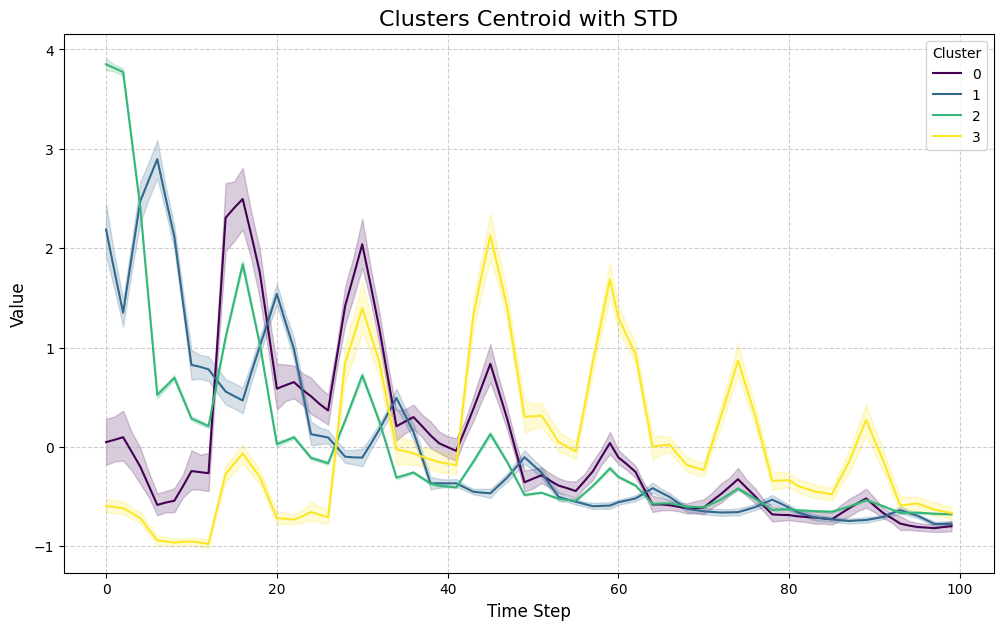

In [ ]:
    # --- Bước 5: Chuyển đổi kiểu dữ liệu và vẽ biểu đồ ---
    # Chuyển cột 'time' sang kiểu số (bây giờ sẽ không còn lỗi)
    df_melt['time'] = pd.to_numeric(df_melt['time'])

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_melt, x="time", y="observation", hue="cluster", palette="viridis")
    plt.title("Clusters Centroid with STD", fontsize=16)
    plt.xlabel("Time Step", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

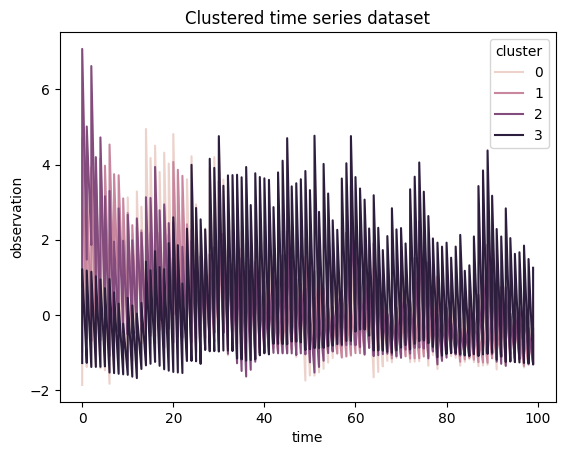

In [ ]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

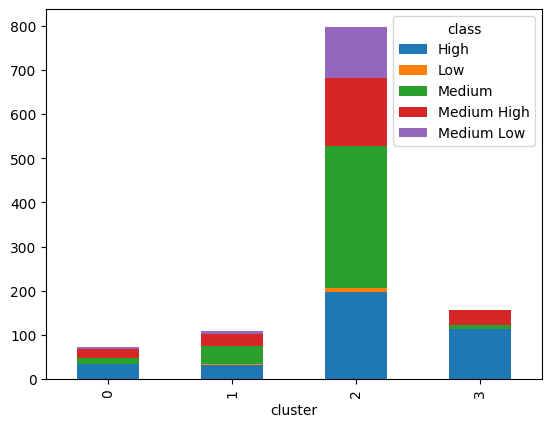

In [ ]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)
plt.legend(title="class")

### Visualize

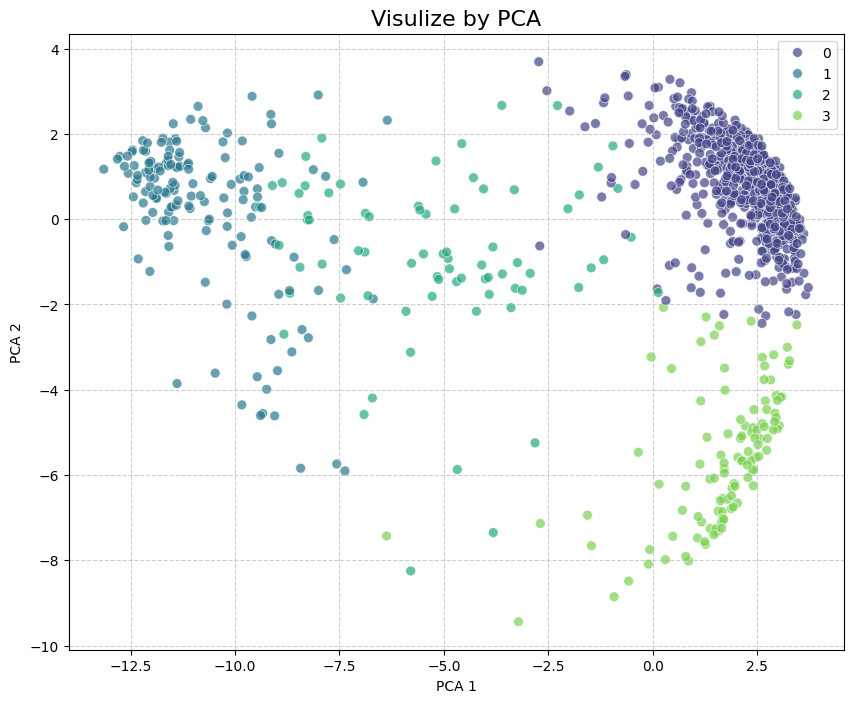

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans # <-- Dùng thư viện tslearn
from sklearn.decomposition import PCA

# --- Bước 1: Chuẩn bị dữ liệu ---
try:
    #df_full = pd.read_csv('time-series-nomalize.csv')
    #time_series_columns = [str(i) for i in range(100)]
    #X = df_full[time_series_columns].to_numpy()

    # --- Bước 2: Chạy TimeSeriesKMeans (DTW) để lấy nhãn cụm ---
    # Sử dụng chính xác clusterer của bạn
    clusterer = TimeSeriesKMeans(n_clusters=4, metric="euclidean", random_state=42)
    labels = clusterer.fit_predict(X)

    # --- Bước 3: Áp dụng PCA trên dữ liệu gốc X ---
    # PCA vẫn hoạt động trên không gian Euclidean của dữ liệu gốc
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    # --- Bước 4: Tạo DataFrame và vẽ biểu đồ ---
    df_pca = pd.DataFrame(data=X_pca, columns=['PCA 1', 'PCA 2'])
    df_pca['Cụm (Cluster)'] = labels # <-- Sử dụng nhãn từ K-Means DTW
    df_pca['Cụm (Cluster)'] = df_pca['Cụm (Cluster)'].astype('category')

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="PCA 1",
        y="PCA 2",
        hue="Cụm (Cluster)",
        palette="viridis",
        data=df_pca,
        alpha=0.7,
        s=50
    )
    plt.title('Visulize by PCA', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

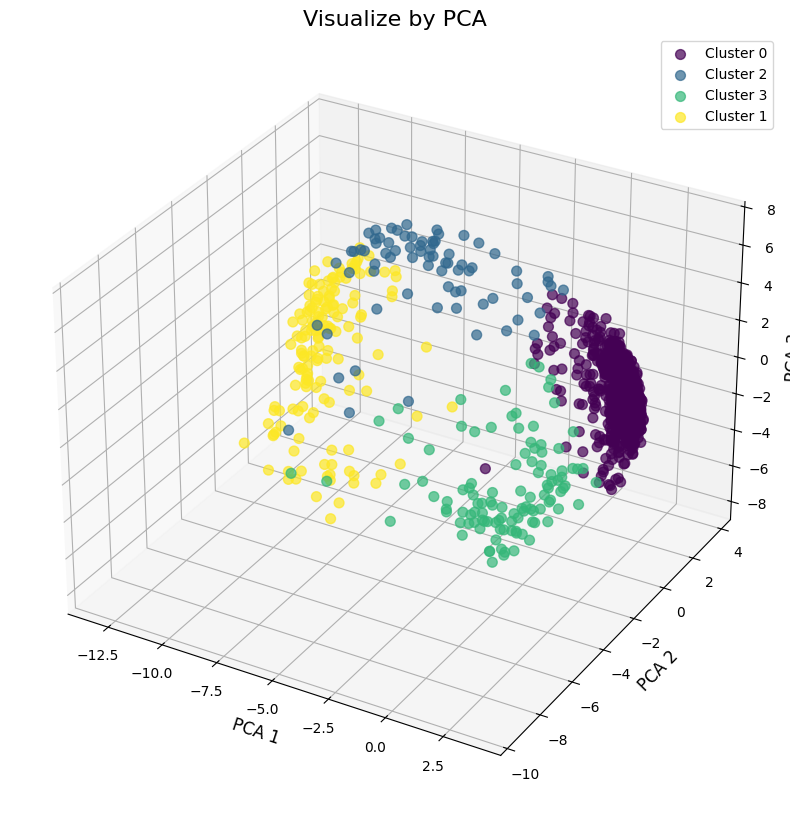

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <-- Thư viện cần thiết cho vẽ 3D
from tslearn.clustering import TimeSeriesKMeans
from sklearn.decomposition import PCA
# --- Bước 2: Chạy TimeSeriesKMeans để lấy nhãn cụm ---
clusterer = TimeSeriesKMeans(n_clusters=4, metric="euclidean", random_state=42)
labels = clusterer.fit_predict(X)

# --- Bước 3: Áp dụng PCA trên dữ liệu gốc X (với 3 thành phần) ---
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

# --- Bước 4: Tạo DataFrame và vẽ biểu đồ 3D ---
# Cập nhật DataFrame để có 3 cột PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PCA 1', 'PCA 2', 'PCA 3'])
df_pca['Cụm (Cluster)'] = labels
df_pca['Cụm (Cluster)'] = df_pca['Cụm (Cluster)'].astype('category')

# Bắt đầu vẽ biểu đồ 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d') # <-- Tạo một trục 3D

# Xác định màu cho từng cụm
targets = df_pca['Cụm (Cluster)'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(targets)))

# Vẽ các điểm dữ liệu cho từng cụm với màu tương ứng
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Cụm (Cluster)'] == target
    ax.scatter(
        df_pca.loc[indices_to_keep, 'PCA 1'],
        df_pca.loc[indices_to_keep, 'PCA 2'],
        df_pca.loc[indices_to_keep, 'PCA 3'],
        c=[color], # <-- Màu sắc cho cụm hiện tại
        label=f'Cluster {target}',
        s=50,
        alpha=0.7
    )

# Đặt tên cho các trục
ax.set_xlabel('PCA 1', fontsize=12)
ax.set_ylabel('PCA 2', fontsize=12)
ax.set_zlabel('PCA 3', fontsize=12)

# Đặt tiêu đề và hiển thị chú thích
ax.set_title('Visualize by PCA', fontsize=16)
ax.legend()
ax.grid(True)

plt.show()

# except FileNotFoundError:
#     print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
# except Exception as e:
#     print(f"Đã xảy ra lỗi: {e}")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


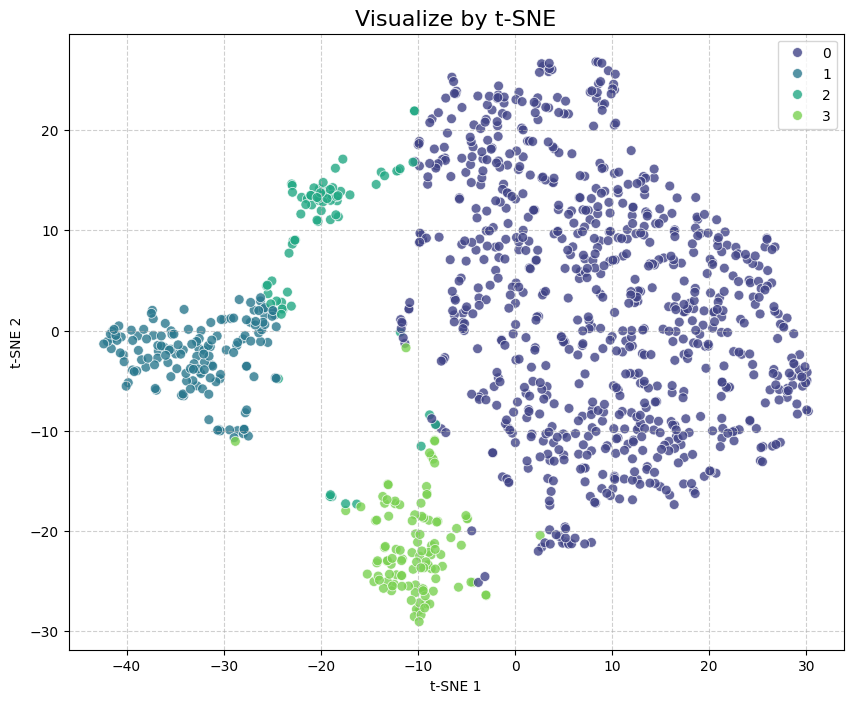

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans # <-- Dùng thư viện tslearn
from sklearn.manifold import TSNE              # <-- Dùng t-SNE

# --- Bước 1: Chuẩn bị dữ liệu ---
try:
    #df_full = pd.read_csv('time-series-nomalize.csv')
    #time_series_columns = [str(i) for i in range(100)]
    #X = df_full[time_series_columns].to_numpy()

    # --- Bước 2: Chạy TimeSeriesKMeans (DTW) để lấy nhãn cụm ---
    # Sử dụng clusterer DTW của bạn
    clusterer = TimeSeriesKMeans(n_clusters=4, metric="euclidean", random_state=42)

    labels = clusterer.fit_predict(X)

    # --- Bước 3: Áp dụng t-SNE trên dữ liệu gốc X ---
    # t-SNE vẫn hoạt động trên không gian Euclidean của dữ liệu gốc
    # Lưu ý: t-SNE có thể chạy khá chậm
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=500)
    X_tsne = tsne.fit_transform(X)

    # --- Bước 4: Tạo DataFrame và vẽ biểu đồ ---
    df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE 1', 't-SNE 2'])
    df_tsne['Cụm (Cluster)'] = labels # <-- Sử dụng nhãn từ K-Means DTW
    df_tsne['Cụm (Cluster)'] = df_tsne['Cụm (Cluster)'].astype('category')

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="t-SNE 1",
        y="t-SNE 2",
        hue="Cụm (Cluster)",
        palette="viridis",
        data=df_tsne,
        alpha=0.8,
        s=50
    )
    plt.title('Visualize by t-SNE', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

# K = 8

In [ ]:
clusterer = TimeSeriesKMeans(n_clusters=8, metric="euclidean", random_state=42)

In [ ]:
%%time
clusterer.fit(X)

CPU times: user 25.4 s, sys: 19.2 ms, total: 25.4 s
Wall time: 30.6 s


TimeSeriesKMeans(n_clusters=8, random_state=42)

In [ ]:
df["cluster"] = clusterer.labels_
df.head()

0         1         2         3         4         5         6  \
0  2.482691  3.103747  3.559498  3.661604  3.738018  1.922693  0.504129   
1  0.755653  1.473569  2.093652  2.228891  2.382833  2.080704  1.754117   
2  2.558031  2.242591  1.877203  1.821367  1.766713  1.143775  0.274846   
3  3.420437  1.788017 -0.158955 -0.137211 -0.107383 -0.125422 -0.147817   
4  4.115150  3.170309  2.253611  2.175913  2.102388  2.173167  2.239405   

          7         8         9  ...        94        95        96        97  \
0  0.340080  0.176768  0.674897  ... -0.914582 -0.889037 -0.855150 -0.814026   
1  0.863556 -0.173753  0.073705  ... -0.954972 -0.778011 -0.881598 -0.969359   
2  0.323123  0.381604  0.346184  ... -0.818806 -0.813383 -0.794138 -0.777756   
3 -0.386230 -0.579652 -0.575373  ... -0.555855 -0.611540 -0.612517 -0.613961   
4  1.816339  1.449363  1.226049  ... -0.640356 -0.654466 -0.664568 -0.672808   

         98        99  rating                              genre  \
0 -0.719893 -0.618230     8.3            ['Adventure', 'Sci-Fi']   
1 -0.985185 -1.005327     7.1      ['Crime', 'Drama', 'Romance']   
2 -0.800588 -0.827329     8.7           ['Documentary', 'Music']   
3 -0.615186 -0.616180     7.4  ['Action', 'Adventure', 'Sci-Fi']   
4 -0.672403 -0.671974     7.3   ['Adventure', 'Comedy', 'Drama']   

   rating_category  cluster  
0             High        0  
1             High        0  
2             High        0  
3             High        6  
4             High        4  

[5 rows x 104 columns]

In [ ]:
df_clustered = pd.DataFrame(X, columns=time_series_columns)
df_clustered['cluster'] = clusterer.labels_
df_clustered.head()

0         1         2         3         4         5         6  \
0  2.482691  3.103747  3.559498  3.661604  3.738018  1.922693  0.504129   
1  0.755653  1.473569  2.093652  2.228891  2.382833  2.080704  1.754117   
2  2.558031  2.242591  1.877203  1.821367  1.766713  1.143775  0.274846   
3  3.420437  1.788017 -0.158955 -0.137211 -0.107383 -0.125422 -0.147817   
4  4.115150  3.170309  2.253611  2.175913  2.102388  2.173167  2.239405   

          7         8         9  ...        91        92        93        94  \
0  0.340080  0.176768  0.674897  ... -0.668877 -0.801254 -0.939168 -0.914582   
1  0.863556 -0.173753  0.073705  ...  0.826150 -0.211159 -1.094527 -0.954972   
2  0.323123  0.381604  0.346184  ... -0.744741 -0.784952 -0.823669 -0.818806   
3 -0.386230 -0.579652 -0.575373  ... -0.476899 -0.488232 -0.496086 -0.555855   
4  1.816339  1.449363  1.226049  ... -0.648343 -0.639480 -0.627899 -0.640356   

         95        96        97        98        99  cluster  
0 -0.889037 -0.855150 -0.814026 -0.719893 -0.618230        0  
1 -0.778011 -0.881598 -0.969359 -0.985185 -1.005327        0  
2 -0.813383 -0.794138 -0.777756 -0.800588 -0.827329        0  
3 -0.611540 -0.612517 -0.613961 -0.615186 -0.616180        6  
4 -0.654466 -0.664568 -0.672808 -0.672403 -0.671974        4  

[5 rows x 101 columns]

In [ ]:
    # --- Bước 4: Melt DataFrame sạch này ---
    # Bây giờ melt sẽ chỉ hoạt động trên các cột số và cột 'cluster'
    df_melt = df_clustered.melt(
        id_vars='cluster',
        value_vars=time_series_columns,
        var_name='time',
        value_name='observation'
    )

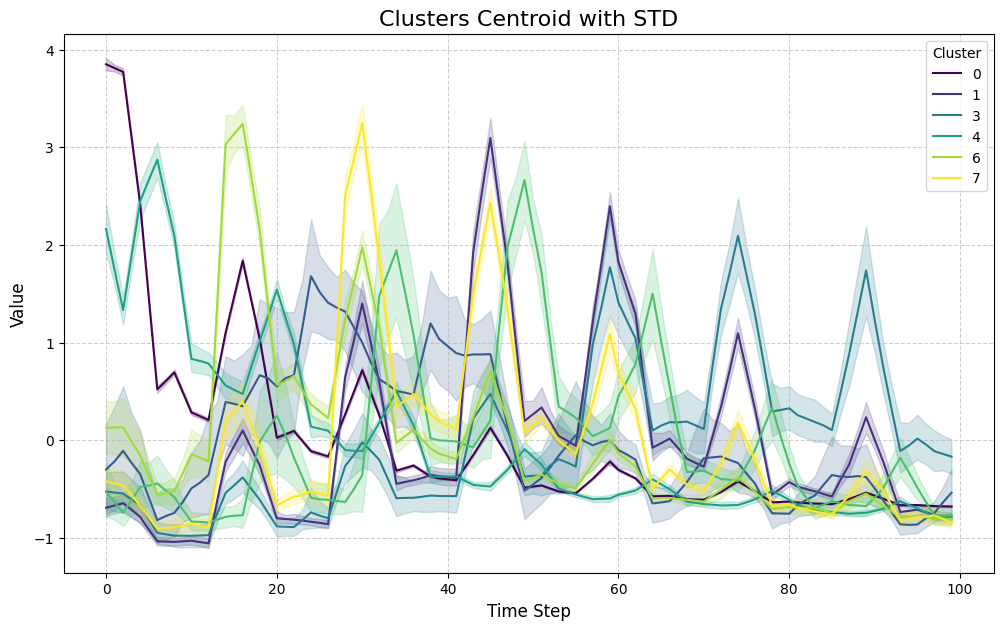

In [ ]:
    # --- Bước 5: Chuyển đổi kiểu dữ liệu và vẽ biểu đồ ---
    # Chuyển cột 'time' sang kiểu số (bây giờ sẽ không còn lỗi)
    df_melt['time'] = pd.to_numeric(df_melt['time'])

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_melt, x="time", y="observation", hue="cluster", palette="viridis")
    plt.title("Clusters Centroid with STD", fontsize=16)
    plt.xlabel("Time Step", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

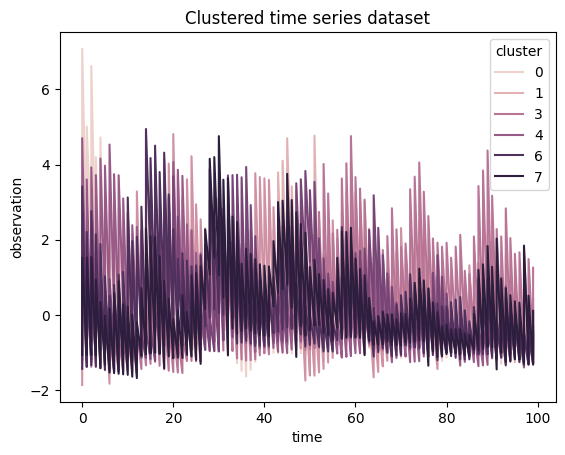

In [ ]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

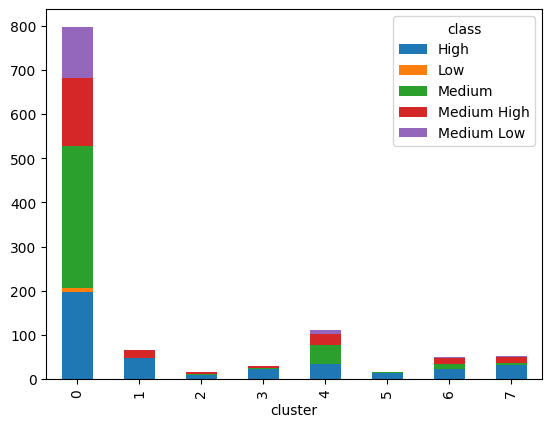

In [ ]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)
plt.legend(title="class")

In [ ]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 7.5 MB/s eta 0:00:00


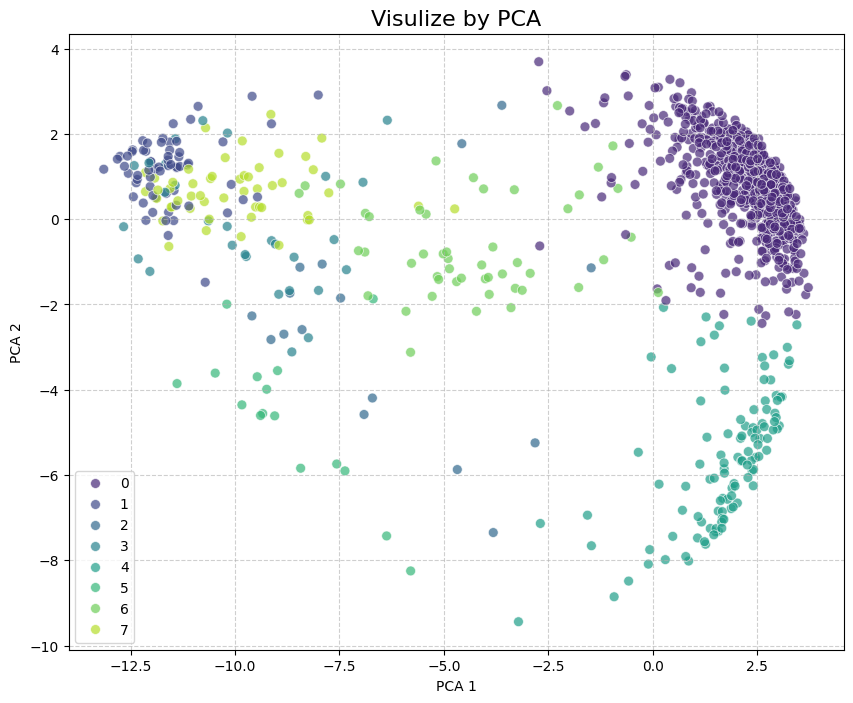

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans # <-- Dùng thư viện tslearn
from sklearn.decomposition import PCA

# --- Bước 1: Chuẩn bị dữ liệu ---
try:
    #df_full = pd.read_csv('time-series-nomalize.csv')
    #time_series_columns = [str(i) for i in range(100)]
    #X = df_full[time_series_columns].to_numpy()

    # --- Bước 2: Chạy TimeSeriesKMeans (DTW) để lấy nhãn cụm ---
    # Sử dụng chính xác clusterer của bạn
    clusterer = TimeSeriesKMeans(n_clusters=8, metric="euclidean", random_state=42)
    labels = clusterer.fit_predict(X)

    # --- Bước 3: Áp dụng PCA trên dữ liệu gốc X ---
    # PCA vẫn hoạt động trên không gian Euclidean của dữ liệu gốc
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    # --- Bước 4: Tạo DataFrame và vẽ biểu đồ ---
    df_pca = pd.DataFrame(data=X_pca, columns=['PCA 1', 'PCA 2'])
    df_pca['Cụm (Cluster)'] = labels # <-- Sử dụng nhãn từ K-Means DTW
    df_pca['Cụm (Cluster)'] = df_pca['Cụm (Cluster)'].astype('category')

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="PCA 1",
        y="PCA 2",
        hue="Cụm (Cluster)",
        palette="viridis",
        data=df_pca,
        alpha=0.7,
        s=50
    )
    plt.title('Visulize by PCA', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


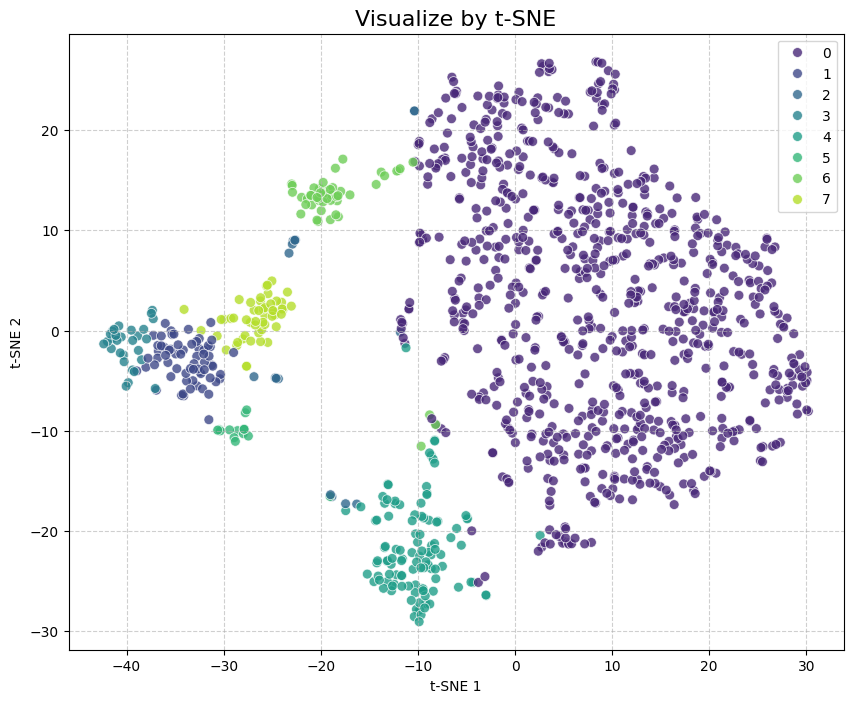

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans # <-- Dùng thư viện tslearn
from sklearn.manifold import TSNE              # <-- Dùng t-SNE

# --- Bước 1: Chuẩn bị dữ liệu ---
try:
    #df_full = pd.read_csv('time-series-nomalize.csv')
    #time_series_columns = [str(i) for i in range(100)]
    #X = df_full[time_series_columns].to_numpy()

    # --- Bước 2: Chạy TimeSeriesKMeans (DTW) để lấy nhãn cụm ---
    # Sử dụng clusterer DTW của bạn
    clusterer = TimeSeriesKMeans(n_clusters=8, metric="euclidean", random_state=42)

    labels = clusterer.fit_predict(X)

    # --- Bước 3: Áp dụng t-SNE trên dữ liệu gốc X ---
    # t-SNE vẫn hoạt động trên không gian Euclidean của dữ liệu gốc
    # Lưu ý: t-SNE có thể chạy khá chậm
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=500)
    X_tsne = tsne.fit_transform(X)

    # --- Bước 4: Tạo DataFrame và vẽ biểu đồ ---
    df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE 1', 't-SNE 2'])
    df_tsne['Cụm (Cluster)'] = labels # <-- Sử dụng nhãn từ K-Means DTW
    df_tsne['Cụm (Cluster)'] = df_tsne['Cụm (Cluster)'].astype('category')

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="t-SNE 1",
        y="t-SNE 2",
        hue="Cụm (Cluster)",
        palette="viridis",
        data=df_tsne,
        alpha=0.8,
        s=50
    )
    plt.title('Visualize by t-SNE', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

# =>>> CHỌN K = 4 VÌ SỰ RÕ RÀNG CỦA CÁC CLUSTERS

### DTW

In [ ]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 21.2 MB/s eta 0:00:00



Bắt đầu chạy TimeSeriesKMeans với metric='dtw'...
  k=2, SSE (DTW) = 9.49
  k=3, SSE (DTW) = 7.54
  k=4, SSE (DTW) = 6.23
  k=5, SSE (DTW) = 5.37
  k=6, SSE (DTW) = 5.04
  k=7, SSE (DTW) = 4.51
  k=8, SSE (DTW) = 4.28
  k=9, SSE (DTW) = 4.12
  k=10, SSE (DTW) = 4.02


/tmp/ipython-input-1717678809.py:40: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig('kmeans_dtw_elbow.png')
/tmp/ipython-input-1717678809.py:40: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.savefig('kmeans_dtw_elbow.png')
/tmp/ipython-input-1717678809.py:40: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.savefig('kmeans_dtw_elbow.png')
/tmp/ipython-input-1717678809.py:40: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig('kmeans_dtw_elbow.png')
/tmp/ipython-input-1717678809.py:40: UserWarning: Glyph 7909 (\N{LATIN SMALL LETTER U WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig('kmeans_dtw_elbow.png')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (

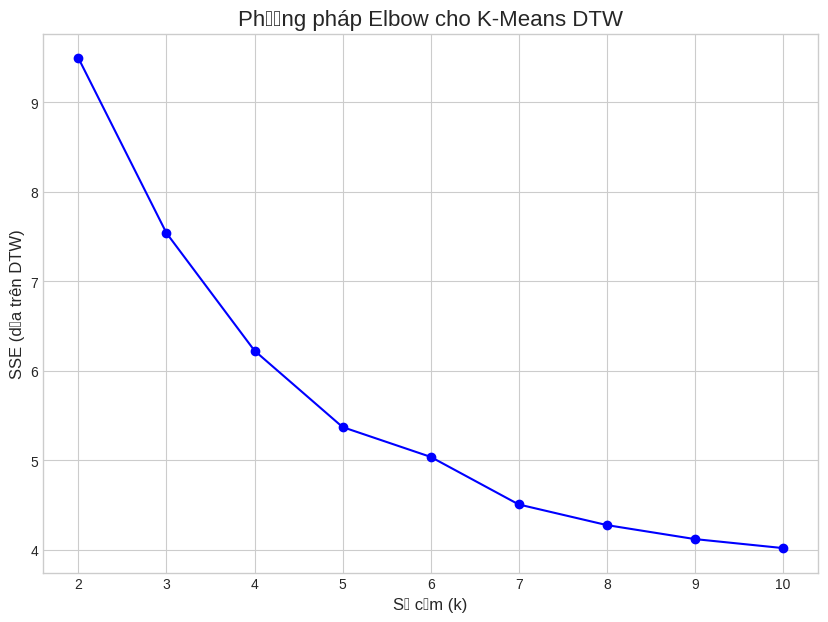

In [ ]:
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans # <-- THAY ĐỔI 1: Import thư viện mới
import matplotlib.pyplot as plt
import numpy as np

# --- Bước 1: Tải và chuẩn bị dữ liệu ---
try:
    # --- Bước 2: Tính toán SSE (dựa trên DTW) cho nhiều giá trị k ---
    k_range = range(2, 11) # Giảm bớt số k để chạy nhanh hơn
    sse_dtw = []

    print("\nBắt đầu chạy TimeSeriesKMeans với metric='dtw'...")
    for k in k_range:
        # --- THAY ĐỔI 2: Sử dụng TimeSeriesKMeans với metric='dtw' ---
        # n_init > 1 để kết quả ổn định hơn, nhưng sẽ chạy chậm hơn.
        # n_jobs=-1 sẽ sử dụng tất cả các lõi CPU để tăng tốc.
        kmeans_dtw = TimeSeriesKMeans(n_clusters=k,
                                      metric="dtw",
                                      metric_params={'sakoe_chiba_radius': 7},
                                      n_init=3,
                                      random_state=42,
                                      n_jobs=-1)

        kmeans_dtw.fit(X)

        # Lấy giá trị SSE (Inertia) dựa trên khoảng cách DTW
        sse_dtw.append(kmeans_dtw.inertia_)

        print(f"  k={k}, SSE (DTW) = {kmeans_dtw.inertia_:.2f}")

    # --- Bước 3: Trực quan hóa kết quả bằng phương pháp Elbow ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 7))
    plt.plot(k_range, sse_dtw, 'bo-')
    plt.xlabel('Số cụm (k)', fontsize=12)
    plt.ylabel('SSE (dựa trên DTW)', fontsize=12)
    plt.title('Phương pháp Elbow cho K-Means DTW', fontsize=16)
    plt.xticks(k_range)
    plt.grid(True)
    plt.savefig('kmeans_dtw_elbow.png')
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

# Test n = 5 và 7

## n=5

In [ ]:

clusterer = TimeSeriesKMeans(
    n_clusters=5,
    metric="dtw",
    metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 7},
    random_state=42
)

In [ ]:
%%time
clusterer.fit(X)

CPU times: user 10min 52s, sys: 4.27 s, total: 10min 57s
Wall time: 11min 18s


TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba',
                                'sakoe_chiba_radius': 7},
                 n_clusters=5, random_state=42)

In [ ]:
df["cluster"] = clusterer.labels_
df.head()

0         1         2         3         4         5         6  \
0  2.482691  3.103747  3.559498  3.661604  3.738018  1.922693  0.504129   
1  0.755653  1.473569  2.093652  2.228891  2.382833  2.080704  1.754117   
2  2.558031  2.242591  1.877203  1.821367  1.766713  1.143775  0.274846   
3  3.420437  1.788017 -0.158955 -0.137211 -0.107383 -0.125422 -0.147817   
4  4.115150  3.170309  2.253611  2.175913  2.102388  2.173167  2.239405   

          7         8         9  ...        94        95        96        97  \
0  0.340080  0.176768  0.674897  ... -0.914582 -0.889037 -0.855150 -0.814026   
1  0.863556 -0.173753  0.073705  ... -0.954972 -0.778011 -0.881598 -0.969359   
2  0.323123  0.381604  0.346184  ... -0.818806 -0.813383 -0.794138 -0.777756   
3 -0.386230 -0.579652 -0.575373  ... -0.555855 -0.611540 -0.612517 -0.613961   
4  1.816339  1.449363  1.226049  ... -0.640356 -0.654466 -0.664568 -0.672808   

         98        99  rating                              genre  \
0 -0.719893 -0.618230     8.3            ['Adventure', 'Sci-Fi']   
1 -0.985185 -1.005327     7.1      ['Crime', 'Drama', 'Romance']   
2 -0.800588 -0.827329     8.7           ['Documentary', 'Music']   
3 -0.615186 -0.616180     7.4  ['Action', 'Adventure', 'Sci-Fi']   
4 -0.672403 -0.671974     7.3   ['Adventure', 'Comedy', 'Drama']   

   rating_category  cluster  
0             High        3  
1             High        4  
2             High        3  
3             High        0  
4             High        1  

[5 rows x 104 columns]

In [ ]:
    # --- Bước 4: Melt DataFrame sạch này ---
    # Bây giờ melt sẽ chỉ hoạt động trên các cột số và cột 'cluster'
    df_melt = df.melt(
        id_vars='cluster',
        value_vars=time_series_columns,
        var_name='time',
        value_name='observation'
    )

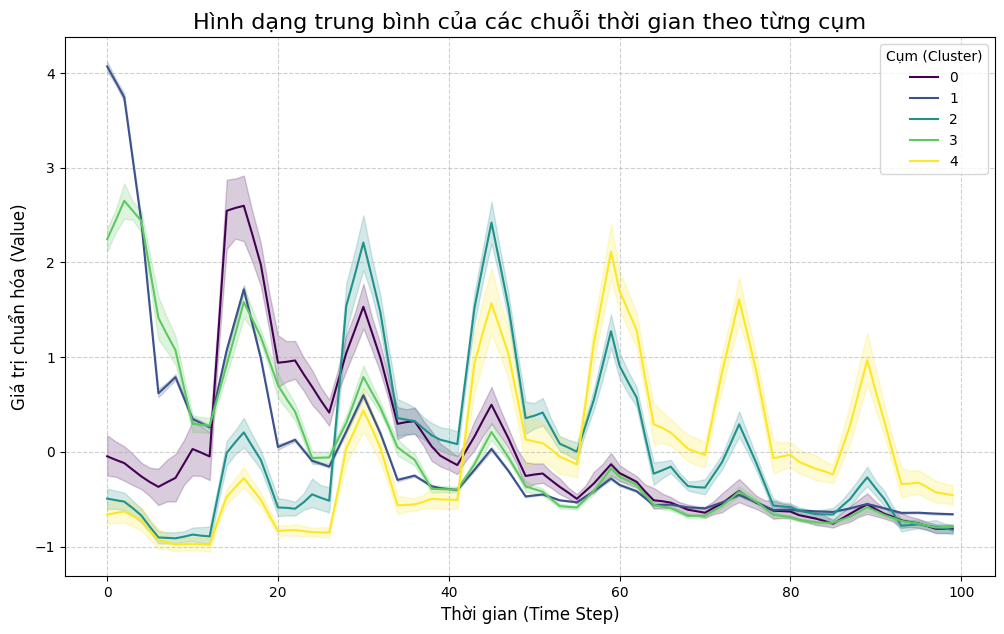

In [ ]:
    # --- Bước 5: Chuyển đổi kiểu dữ liệu và vẽ biểu đồ ---
    # Chuyển cột 'time' sang kiểu số (bây giờ sẽ không còn lỗi)
    df_melt['time'] = pd.to_numeric(df_melt['time'])

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_melt, x="time", y="observation", hue="cluster", palette="viridis")
    plt.title("Hình dạng trung bình của các chuỗi thời gian theo từng cụm", fontsize=16)
    plt.xlabel("Thời gian (Time Step)", fontsize=12)
    plt.ylabel("Giá trị chuẩn hóa (Value)", fontsize=12)
    plt.legend(title='Cụm (Cluster)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

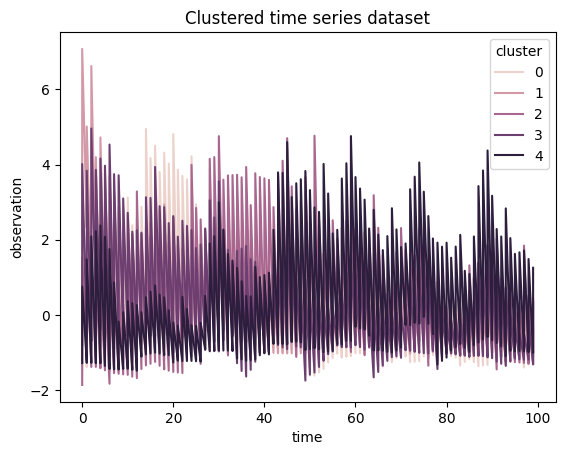

In [ ]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

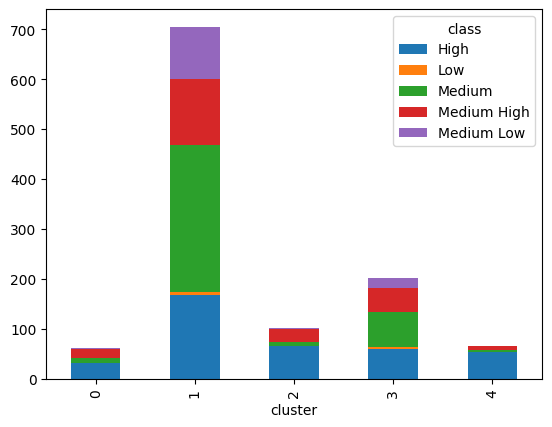

In [ ]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)
plt.legend(title="class")

### Minh họa bằng PCA

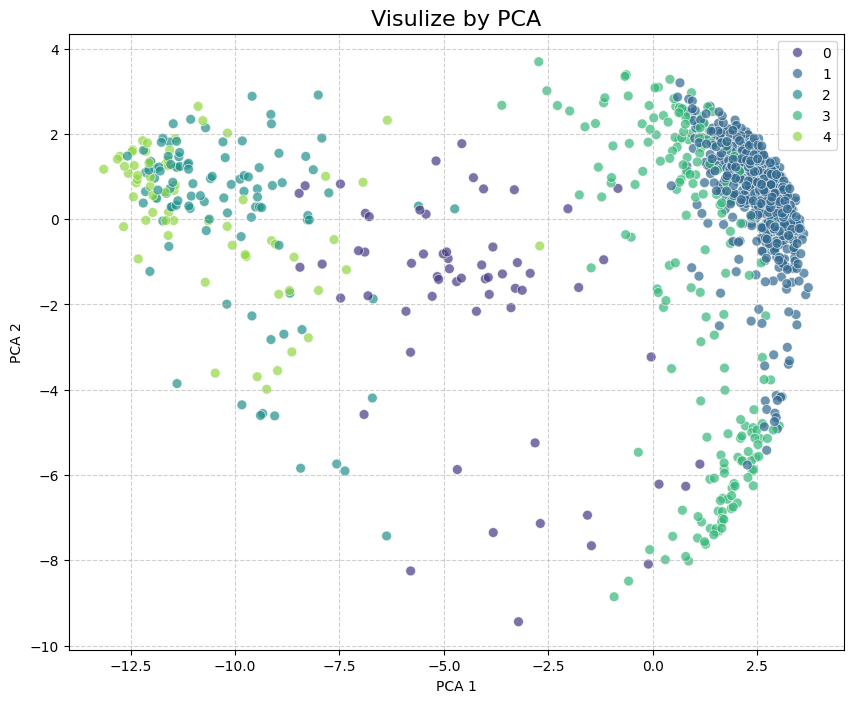

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans # <-- Dùng thư viện tslearn
from sklearn.decomposition import PCA

# --- Bước 1: Chuẩn bị dữ liệu ---
try:
    #df_full = pd.read_csv('time-series-nomalize.csv')
    #time_series_columns = [str(i) for i in range(100)]
    #X = df_full[time_series_columns].to_numpy()

    # --- Bước 2: Chạy TimeSeriesKMeans (DTW) để lấy nhãn cụm ---
    # Sử dụng chính xác clusterer của bạn
    clusterer = TimeSeriesKMeans(
        n_clusters=5,
        metric="dtw",
        metric_params={'sakoe_chiba_radius': 7},
        random_state=42
    )
    labels = clusterer.fit_predict(X)

    # --- Bước 3: Áp dụng PCA trên dữ liệu gốc X ---
    # PCA vẫn hoạt động trên không gian Euclidean của dữ liệu gốc
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    # --- Bước 4: Tạo DataFrame và vẽ biểu đồ ---
    df_pca = pd.DataFrame(data=X_pca, columns=['PCA 1', 'PCA 2'])
    df_pca['Cụm (Cluster)'] = labels # <-- Sử dụng nhãn từ K-Means DTW
    df_pca['Cụm (Cluster)'] = df_pca['Cụm (Cluster)'].astype('category')

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="PCA 1",
        y="PCA 2",
        hue="Cụm (Cluster)",
        palette="viridis",
        data=df_pca,
        alpha=0.7,
        s=50
    )
    plt.title('Visulize by PCA', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

### T-SNE

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


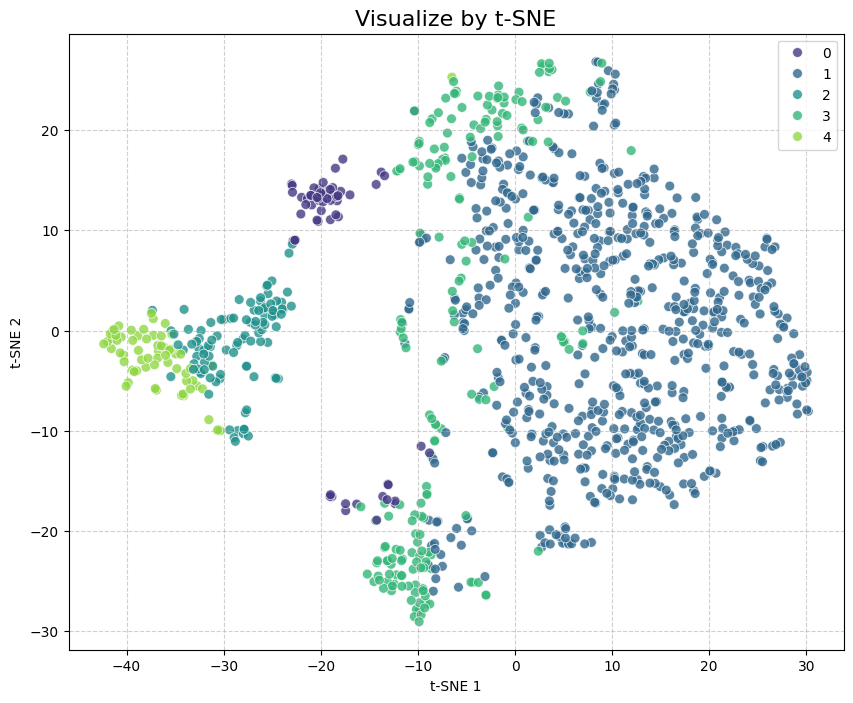

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans # <-- Dùng thư viện tslearn
from sklearn.manifold import TSNE              # <-- Dùng t-SNE

# --- Bước 1: Chuẩn bị dữ liệu ---
try:
    #df_full = pd.read_csv('time-series-nomalize.csv')
    #time_series_columns = [str(i) for i in range(100)]
    #X = df_full[time_series_columns].to_numpy()

    # --- Bước 2: Chạy TimeSeriesKMeans (DTW) để lấy nhãn cụm ---
    # Sử dụng clusterer DTW của bạn
    clusterer = TimeSeriesKMeans(
        n_clusters=5,
        metric="dtw",
        metric_params={'sakoe_chiba_radius': 7},
        random_state=42
    )
    labels = clusterer.fit_predict(X)

    # --- Bước 3: Áp dụng t-SNE trên dữ liệu gốc X ---
    # t-SNE vẫn hoạt động trên không gian Euclidean của dữ liệu gốc
    # Lưu ý: t-SNE có thể chạy khá chậm
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=500)
    X_tsne = tsne.fit_transform(X)

    # --- Bước 4: Tạo DataFrame và vẽ biểu đồ ---
    df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE 1', 't-SNE 2'])
    df_tsne['Cụm (Cluster)'] = labels # <-- Sử dụng nhãn từ K-Means DTW
    df_tsne['Cụm (Cluster)'] = df_tsne['Cụm (Cluster)'].astype('category')

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="t-SNE 1",
        y="t-SNE 2",
        hue="Cụm (Cluster)",
        palette="viridis",
        data=df_tsne,
        alpha=0.8,
        s=50
    )
    plt.title('Visualize by t-SNE', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

## Test n=7

In [ ]:

clusterer = TimeSeriesKMeans(
    n_clusters=7,
    metric="dtw",
    metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 7},
    random_state=42
)

In [ ]:
%%time
clusterer.fit(X)

CPU times: user 13min 30s, sys: 4.51 s, total: 13min 34s
Wall time: 13min 41s


TimeSeriesKMeans(metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba',
                                'sakoe_chiba_radius': 7},
                 n_clusters=7, random_state=42)

In [ ]:
df["cluster"] = clusterer.labels_
df.head()

0         1         2         3         4         5         6  \
0  2.482691  3.103747  3.559498  3.661604  3.738018  1.922693  0.504129   
1  0.755653  1.473569  2.093652  2.228891  2.382833  2.080704  1.754117   
2  2.558031  2.242591  1.877203  1.821367  1.766713  1.143775  0.274846   
3  3.420437  1.788017 -0.158955 -0.137211 -0.107383 -0.125422 -0.147817   
4  4.115150  3.170309  2.253611  2.175913  2.102388  2.173167  2.239405   

          7         8         9  ...        94        95        96        97  \
0  0.340080  0.176768  0.674897  ... -0.914582 -0.889037 -0.855150 -0.814026   
1  0.863556 -0.173753  0.073705  ... -0.954972 -0.778011 -0.881598 -0.969359   
2  0.323123  0.381604  0.346184  ... -0.818806 -0.813383 -0.794138 -0.777756   
3 -0.386230 -0.579652 -0.575373  ... -0.555855 -0.611540 -0.612517 -0.613961   
4  1.816339  1.449363  1.226049  ... -0.640356 -0.654466 -0.664568 -0.672808   

         98        99  rating                              genre  \
0 -0.719893 -0.618230     8.3            ['Adventure', 'Sci-Fi']   
1 -0.985185 -1.005327     7.1      ['Crime', 'Drama', 'Romance']   
2 -0.800588 -0.827329     8.7           ['Documentary', 'Music']   
3 -0.615186 -0.616180     7.4  ['Action', 'Adventure', 'Sci-Fi']   
4 -0.672403 -0.671974     7.3   ['Adventure', 'Comedy', 'Drama']   

   rating_category  cluster  
0             High        5  
1             High        6  
2             High        5  
3             High        0  
4             High        1  

[5 rows x 104 columns]

In [ ]:
    # --- Bước 4: Melt DataFrame sạch này ---
    # Bây giờ melt sẽ chỉ hoạt động trên các cột số và cột 'cluster'
    df_melt = df.melt(
        id_vars='cluster',
        value_vars=time_series_columns,
        var_name='time',
        value_name='observation'
    )

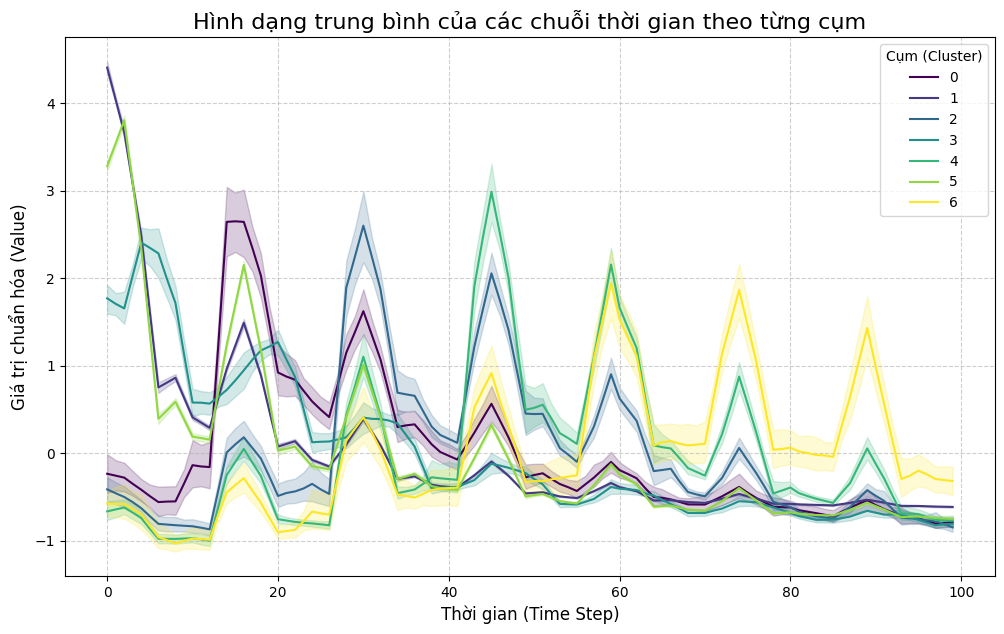

In [ ]:
    # --- Bước 5: Chuyển đổi kiểu dữ liệu và vẽ biểu đồ ---
    # Chuyển cột 'time' sang kiểu số (bây giờ sẽ không còn lỗi)
    df_melt['time'] = pd.to_numeric(df_melt['time'])

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_melt, x="time", y="observation", hue="cluster", palette="viridis")
    plt.title("Hình dạng trung bình của các chuỗi thời gian theo từng cụm", fontsize=16)
    plt.xlabel("Thời gian (Time Step)", fontsize=12)
    plt.ylabel("Giá trị chuẩn hóa (Value)", fontsize=12)
    plt.legend(title='Cụm (Cluster)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

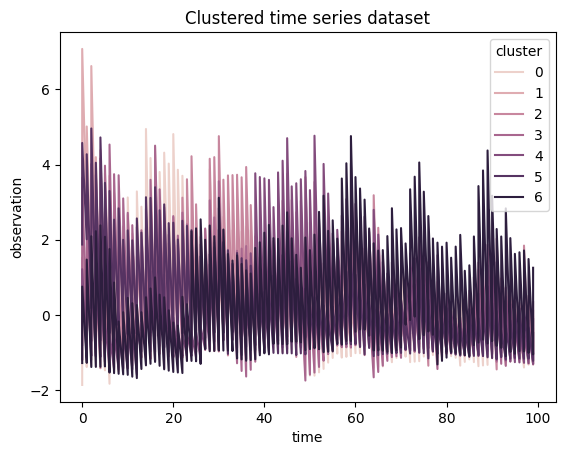

In [ ]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

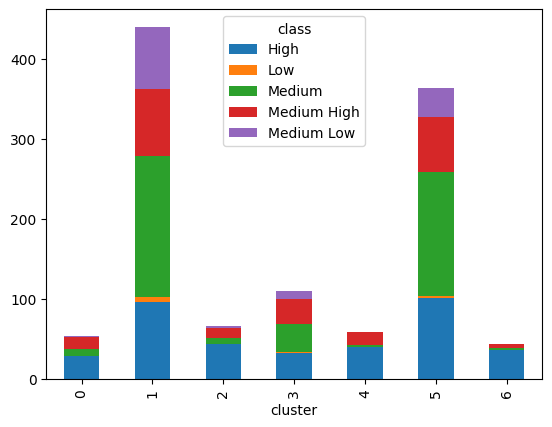

In [ ]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)
plt.legend(title="class")

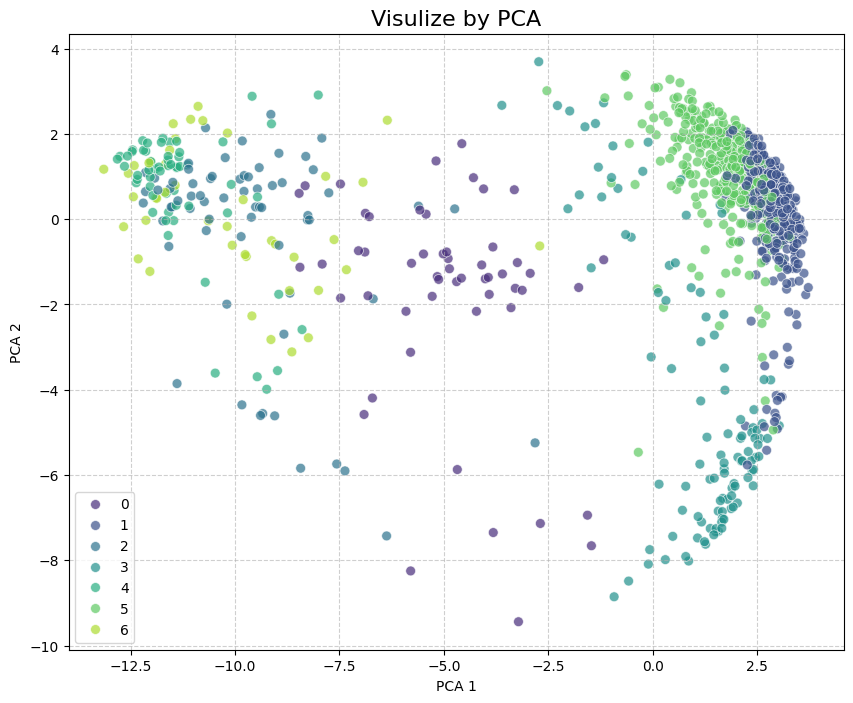

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans # <-- Dùng thư viện tslearn
from sklearn.decomposition import PCA

# --- Bước 1: Chuẩn bị dữ liệu ---
try:
    #df_full = pd.read_csv('time-series-nomalize.csv')
    #time_series_columns = [str(i) for i in range(100)]
    #X = df_full[time_series_columns].to_numpy()

    # --- Bước 2: Chạy TimeSeriesKMeans (DTW) để lấy nhãn cụm ---
    # Sử dụng chính xác clusterer của bạn
    clusterer = TimeSeriesKMeans(
        n_clusters=7,
        metric="dtw",
        metric_params={'sakoe_chiba_radius': 7},
        random_state=42
    )
    labels = clusterer.fit_predict(X)

    # --- Bước 3: Áp dụng PCA trên dữ liệu gốc X ---
    # PCA vẫn hoạt động trên không gian Euclidean của dữ liệu gốc
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    # --- Bước 4: Tạo DataFrame và vẽ biểu đồ ---
    df_pca = pd.DataFrame(data=X_pca, columns=['PCA 1', 'PCA 2'])
    df_pca['Cụm (Cluster)'] = labels # <-- Sử dụng nhãn từ K-Means DTW
    df_pca['Cụm (Cluster)'] = df_pca['Cụm (Cluster)'].astype('category')

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="PCA 1",
        y="PCA 2",
        hue="Cụm (Cluster)",
        palette="viridis",
        data=df_pca,
        alpha=0.7,
        s=50
    )
    plt.title('Visulize by PCA', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


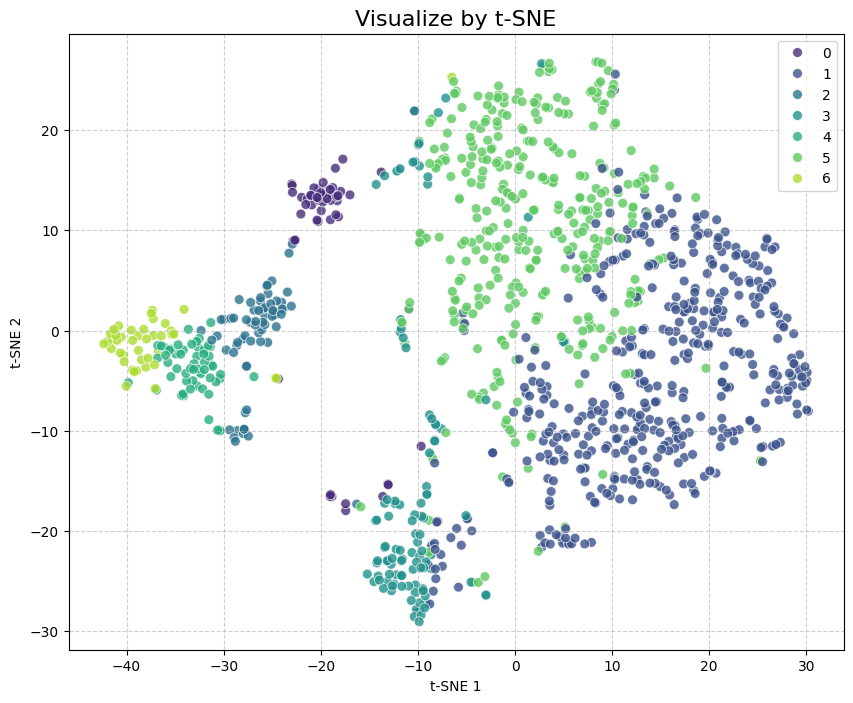

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans # <-- Dùng thư viện tslearn
from sklearn.manifold import TSNE              # <-- Dùng t-SNE

# --- Bước 1: Chuẩn bị dữ liệu ---
try:
    #df_full = pd.read_csv('time-series-nomalize.csv')
    #time_series_columns = [str(i) for i in range(100)]
    #X = df_full[time_series_columns].to_numpy()

    # --- Bước 2: Chạy TimeSeriesKMeans (DTW) để lấy nhãn cụm ---
    # Sử dụng clusterer DTW của bạn
    clusterer = TimeSeriesKMeans(
        n_clusters=7,
        metric="dtw",
        metric_params={'sakoe_chiba_radius': 7},
        random_state=42
    )
    labels = clusterer.fit_predict(X)

    # --- Bước 3: Áp dụng t-SNE trên dữ liệu gốc X ---
    # t-SNE vẫn hoạt động trên không gian Euclidean của dữ liệu gốc
    # Lưu ý: t-SNE có thể chạy khá chậm
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=500)
    X_tsne = tsne.fit_transform(X)

    # --- Bước 4: Tạo DataFrame và vẽ biểu đồ ---
    df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE 1', 't-SNE 2'])
    df_tsne['Cụm (Cluster)'] = labels # <-- Sử dụng nhãn từ K-Means DTW
    df_tsne['Cụm (Cluster)'] = df_tsne['Cụm (Cluster)'].astype('category')

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="t-SNE 1",
        y="t-SNE 2",
        hue="Cụm (Cluster)",
        palette="viridis",
        data=df_tsne,
        alpha=0.8,
        s=50
    )
    plt.title('Visualize by t-SNE', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp 'time-series-nomalize.csv'.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")